# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Your code here.

# Create a dictionary with the data
data = {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
}

# make the dictionary a dataframe
student_data = pd.DataFrame(data)

In [20]:
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

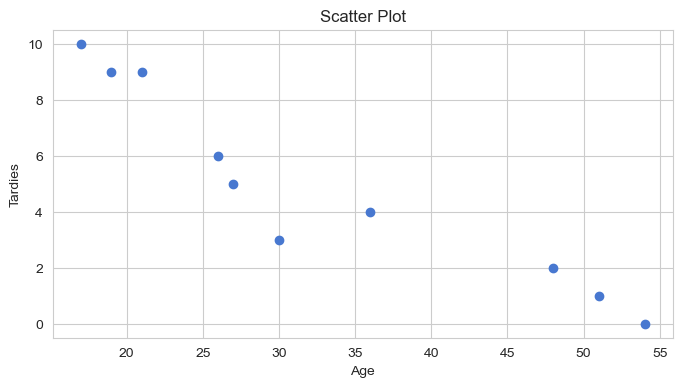

In [56]:
# Your code here.

# Size the plot
plt.figure(figsize=(8, 4))
# Plot the plot
plt.scatter(student_data['Age'],student_data['Tardies'])

# Add Labels
plt.ylabel("Tardies")
plt.xlabel("Age")
plt.title('Scatter Plot')

# Show
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [57]:
# Your response here. 
# The older the student the less tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [58]:
# Your response here.
#correlation:
correlation = student_data['Age'].corr(student_data['Tardies'])

#covariance:
covariance = np.cov(student_data['Age'], student_data['Tardies'])[0, 1]

print("Covariance:", covariance)
print("Correlation:", correlation)

Covariance: -45.56666666666667
Correlation: -0.9391626886887122


In [ ]:
'''
Correlation is a standardized measure of the linear relationship between two variables.
It provides information about both the direction and the strength of the relationship between the variables.

Covariance measures the extent to which two variables change together.
It indicates the direction of the linear relationship between the variables (positive or negative),
but it does not provide information about the strength of the relationship.

Covariance: -45.56666666666667
Correlation: -0.9391626886887122

The covariance is negative -45.5 which means as age increases, tardies decrease
The correlation is negative -0.9. This is a strong correlation almost at 1 to 1

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [136]:
from sklearn import linear_model

X4=student_data.drop(columns=['Age'])
y4=student_data['Age']

model_4 = linear_model.LinearRegression()
result_4 = model.fit(X4,y4)

result_4.score(X4,y4)

0.9042498364782551

Plot your regression model on your scatter plot.

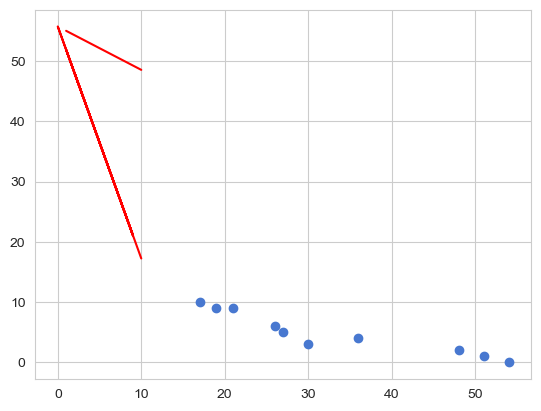

In [139]:
# Your code here.

regression_line = result.intercept_ + result.coef_*X

plt.plot( X, regression_line, c='red')
plt.scatter(student_data['Age'], student_data['Tardies'])

plt.show()

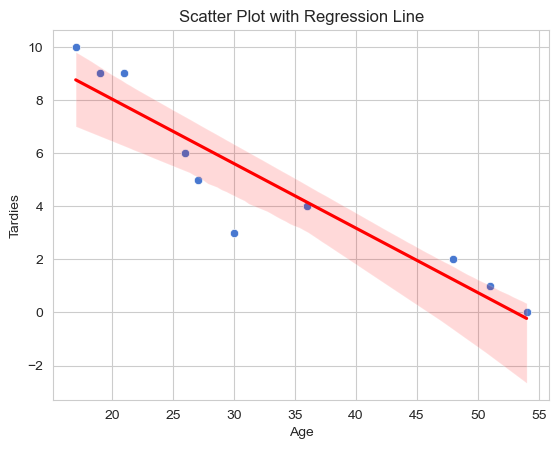

In [70]:
# Plot scatter plot
sns.scatterplot(x='Age', y='Tardies', data=student_data)

# Fit and plot regression line
sns.regplot(x='Age', y='Tardies', data=student_data, scatter=False, color='red')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Scatter Plot with Regression Line')

# Show plot
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# Age is a great predictor of tardies
# Accurate results

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [81]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

vehicles = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [84]:
# Your response here. 
vehicles.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


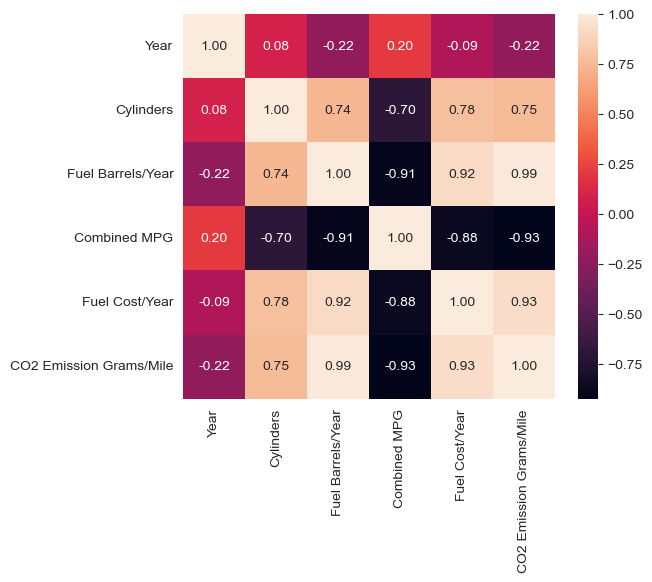

In [94]:
correlation_check = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

plt.figure(figsize=(6, 5))
sns.heatmap(vehicles[correlation_check].corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
# Above is a heat map of the correlation between the selected columns.
# The Outcome has a high positive correlation with Fuel Barrels/Year, Fuel Cost/Year and slightly lower with Cylinders
# There is a high negative correlation with Combined MPG
# There is a low correlation with Year which would provide the least amount of helpful information for our model

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [125]:
# Your response here. 
from sklearn import linear_model

X2=vehicles.drop(columns=['Make','Model','Engine Displacement','Transmission',
                         'Drivetrain', 'Vehicle Class', 'Fuel Type','City MPG',
                         'Highway MPG','CO2 Emission Grams/Mile'])

y2=vehicles['CO2 Emission Grams/Mile']

model_2 = linear_model.LinearRegression()
result_2 = model.fit(X2,y2)

result_2.score(X2,y2)

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [112]:
# Your response here.
intercept = model.intercept_
r_squared = model.score(X, y)

print("Intercept:", intercept)
print("Accuracy:", r_squared)

feature_names = X.columns

# Associate each coefficient with its corresponding feature
coefficients_dict = dict(zip(feature_names, coefficients))

# Print the coefficients with their corresponding feature names
for feature, coefficient in coefficients_dict.items():
    print(f"Coefficient of {feature}: {coefficient}")

Intercept: 769.8882836465557
Accuracy: 0.9808734920269122
Coefficient of Year: -0.32061673151874154
Coefficient of Cylinders: 1.8787997557940257
Coefficient of Fuel Barrels/Year: 19.052925065031673
Coefficient of Combined MPG: -3.040399380212789
Coefficient of Fuel Cost/Year: 0.03230947894138514


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [113]:
# Your code here.

data_2 = {
    'X': [1,3,4,6,8,9,11,14],
    'Y': [1,2,4,4,5,7,8,13]
}

test_data = pd.DataFrame(data_2)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [127]:
from sklearn import linear_model

X3=test_data.drop(columns=['Y'])

y3=test_data['Y']

model_3 = linear_model.LinearRegression()
result_3 = model.fit(X3,y3)

result_3.score(X3,y3)

0.9316696375519905

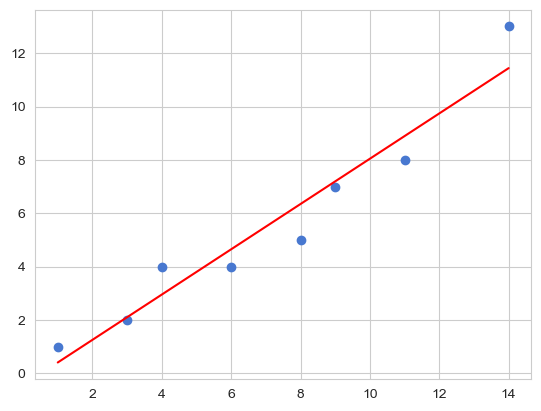

In [128]:
# Your code here.
regression_line_2 = result_3.intercept_ + result_3.coef_*test_data['X']

plt.plot( X3, regression_line_2, c='red')
plt.scatter(test_data['X'], test_data['Y'])

plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
